#   Machine learning and statistical learning
### (Error measure, Overfitting)

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>MAG3</font>**

## 1. Context and objectives

## 2. First steps: preparing the data
**1. From AMeTICE, download the cars dataset (cars.csv).**

**2. Load the CSV file into R or Python.**

**3. Randomly split your dataset into two parts:**

a) a train set that will contain 80% of the observations

b) a test set that will contain the remaining 20%.

**4. From the train set, create two datasets:**

• a training set that will contain 80% of the observations from the train set

• a validation set that waill contain the remining 20%.

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [41]:
# I have public the data into a github link for all users can use this data without downloading.
link_file = "https://raw.githubusercontent.com/lilyhuong/Machine-learning-statistics/master/cars.csv"
df = pd.read_csv(link_file)

In [42]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [43]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

Firstly, we can see that in this dataframe, we 2 types of variables: integer and string. Because Python can not handle on charater variable, so we need convert this varile into numerical variable. In this exercise, we need only 3 explantory variables: fuel, year, km driven

In [44]:
df.fuel = pd.Categorical(df.fuel)
df['fuel_num'] = df.fuel.cat.codes

In [45]:
y = df.selling_price    #set target variable 
X = df[["year", "fuel_num", "km_driven"]] #set 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 8)

In [47]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state = 8)

## 3 Getting to know the data: descriptive statistics

#### 1. Compute some summary statistics for the whole dataset (and comment the outputs):
• for numerical variables: mean, minimum, maximum, quartiles

• for categorical variables: for each category: proportion of observations; mean, minimum, maximum, quartiles of the target variable (selling_price)

#### 2. Create graphs to show the relationship between the target variable and the explanatory variables. Comment on these.

In [48]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_num
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,7907.000000,7912.000000,7907.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,18.802005,1458.625016,91.517919,5.416719,1.891117
std,4.044249,8.062534e+05,5.655055e+04,5.165302,503.916303,35.822499,0.959588,1.002313
min,1983.000000,2.999900e+04,1.000000e+00,-1.000000,624.000000,0.000000,2.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.251852,1197.000000,68.050000,5.000000,1.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.100000,1248.000000,82.000000,5.000000,1.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.070000,1582.000000,102.000000,5.000000,3.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,3.000000


In [49]:
df.describe(include = "all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_num
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,8128.000000,7907.000000,7912.000000,7907.000000,8128.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,18.802005,1458.625016,91.517919,5.416719,1.891117
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,5.165302,503.916303,35.822499,0.959588,1.002313
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,-1.000000,624.000000,0.000000,2.000000,0.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.251852,1197.000000,68.050000,5.000000,1.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.100000,1248.000000,82.000000,5.000000,1.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,22.070000,1582.000000,102.000000,5.000000,3.000000


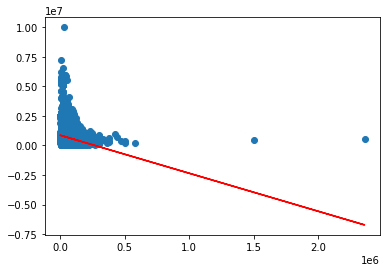

In [50]:
X = df.km_driven
#create basic scatterplot
plt.plot(X, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, y, 1)

#add linear regression line to scatterplot 
plt.plot(X, m * X + b, color = "red")

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

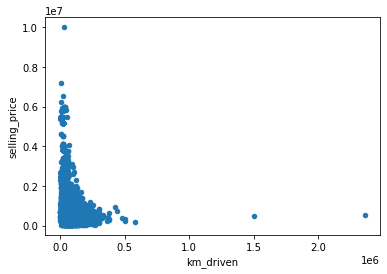

In [51]:
df.plot(kind = 'scatter', x = 'km_driven', y = 'selling_price')

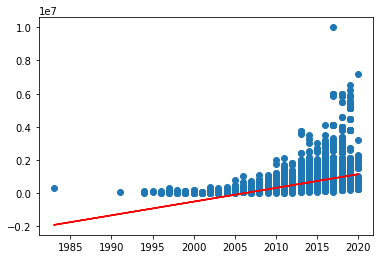

In [52]:
X = df.year
#create basic scatterplot
plt.plot(X, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, y, 1)

#add linear regression line to scatterplot 
plt.plot(X, m * X + b, color = "red")

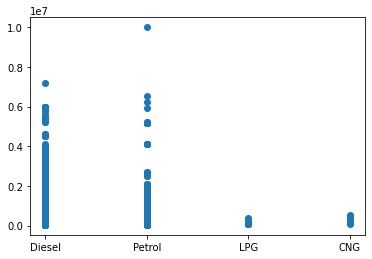

In [53]:
X = df.fuel
#create basic scatterplot
plt.plot(X, y, 'o')

## 4.  Estimations
You will train two different models: a random forest and a SVM. You will understand in more
details how both algorithm work in the subsequent lessons. For now, all you need to understand
is that you can vary some hyperparameters for both models.

 Among the different values that you will try for these hyperparameters, you need to select which provides the best fit, on the
validation set.

Using a random forest algorithm, predict the selling price of the car in the training set.

Use the following variables: year, fuel, km_driven.

If you use R, you can use the randomForest function from {randomForest}. If you use
Python, you can use the RandomForestRegressor function from sklearn.ensemble. You
will use the following hyperparameters for the algorithm:

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

In [55]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_num
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,3
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,3
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,1
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,1
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,1


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [57]:
#creat random forest classifier object
regr = RandomForestRegressor(max_features = 3,  n_estimators = 20, min_samples_leaf = 10)
#train model
regr.fit(X_train_val, y_train_val)

RandomForestRegressor(max_features=3, min_samples_leaf=10, n_estimators=20)

In [58]:
prediction_random = regr.predict(X_val)
prediction_random

array([605230.21924078, 771355.59900588, 710447.6439349 , ...,
       329959.19440111, 408188.65563571, 694816.71516199])

In [59]:
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

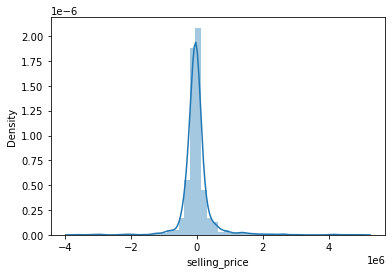

In [60]:
sns.distplot(y_val - prediction_random)

### 2. Compute the mean squared error both for the training and the validation datasets. Compare them with each other.

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
#for train data set
prediction_random1 = regr.predict(X_train_val)
mse_train = mean_squared_error(y_train_val, prediction_random1)
print(mse_train)

220461441643.34897


In [63]:
mse_val = mean_squared_error(y_val, prediction_random )
print(mse_val)

242121304496.34573


In 2 MSE, they are bad with high MSE

### 3. Now, using a loop, make the minimum size of terminal nodes vary as follows: 10, 20,30, . . . , 100. At each iteration, compute the mean squared error (and store it) for both samples.

In [64]:
def mse_compute(Xval, yval):
    global list_MSE
    list_MSE = []
    for i in range(10,101, 10):
        #create a model 
        regr = RandomForestRegressor(max_features = 3,  n_estimators = 20, min_samples_leaf = i)
        #train model
        regr.fit(X_train_val, y_train_val)
        #predict value for valid set
        prediction_random = regr.predict(Xval)
        #calculate MSE
        mse = mean_squared_error(yval, prediction_random )
        list_MSE.append(mse)
        print("With {} of terminal node, the mean squared error is {}".format(i, mse))
    

In [65]:
mse_compute(X_val, y_val)
list_MSE_val = list_MSE

With 10 of terminal node, the mean squared error is 244361411036.64685
With 20 of terminal node, the mean squared error is 265689251816.73068
With 30 of terminal node, the mean squared error is 287870300780.43976
With 40 of terminal node, the mean squared error is 299176122741.32794
With 50 of terminal node, the mean squared error is 309625236048.92676
With 60 of terminal node, the mean squared error is 309809210052.3894
With 70 of terminal node, the mean squared error is 315200967424.4503
With 80 of terminal node, the mean squared error is 319663364865.29675
With 90 of terminal node, the mean squared error is 327796414103.2994
With 100 of terminal node, the mean squared error is 328919814571.4783


In [66]:
mse_compute(X_train_val, y_train_val)
list_MSE_train = list_MSE

With 10 of terminal node, the mean squared error is 221206986235.59714
With 20 of terminal node, the mean squared error is 247897864327.38715
With 30 of terminal node, the mean squared error is 293330010724.80035
With 40 of terminal node, the mean squared error is 315171579272.4796
With 50 of terminal node, the mean squared error is 338691751700.88165
With 60 of terminal node, the mean squared error is 349778719879.351
With 70 of terminal node, the mean squared error is 361796882774.01624
With 80 of terminal node, the mean squared error is 378126062607.599
With 90 of terminal node, the mean squared error is 392089500829.91504
With 100 of terminal node, the mean squared error is 392443499778.95544


### 4. On a graph, plot the mean squared error as a function of the node size, for both samples (one curve for each sample). Comment.

In [67]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

In [68]:
def plot_mse(list_mse):
    x = np.array(list(range(10, 101, 10)))
    y = np.array(list_mse)
    X_Y_Spline = make_interp_spline(x, y)
    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(x.min(), x.max())
    Y_ = X_Y_Spline(X_)
 
    # Plotting the Graph
    plt.plot(X_, Y_)
    plt.xlabel("The node size")
    plt.ylabel("The mean squared error")
    plt.show()


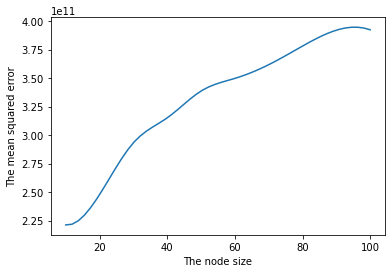

In [69]:
plot_mse(list_MSE_train)

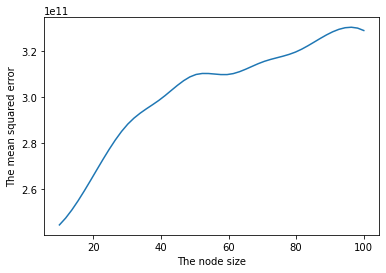

In [70]:
plot_mse(list_MSE_val)

### 5. What are the values for your hyperparameters (the number of trees, the number of variables randomly sampled as candidates at each split, and the minimum size of terminal nodes) that provide the best fit with regard to the MSE?

In [71]:
#In this question, we can see the difference between MSE from training set and validation set, MRS from valid set is higher than 
#the train set. so this is overfitting. I will reduce the number of max_features and min_samples_leaf

In [72]:

regr = RandomForestRegressor(max_features= 1, n_estimators = 400, min_samples_leaf = 3)
        #train model
regr.fit(X_train_val, y_train_val)
        #predict value for valid set
prediction_random = regr.predict(X_val)
        #calculate MSE
mse = mean_squared_error(y_val, prediction_random )
mse

232981639038.0173

## 4.2 A second model: SVM

Now you will train another machine learning model: a support vector machine. You will only
consider a linear kernel, and make only one hyperparameter vary (called the cost parameter;
low values for this hyperparameter lead to a smoother decision surface)

### 1. Using a Support Vector Machine (SVM) with a linear kernel, predict the selling price of the car in the training set. 

Use the following variables: year, fuel, km_driven.

In [73]:
from sklearn import svm

In [74]:
from sklearn.svm import SVC

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_val = sc.fit_transform(X_train_val)
X_val = sc.transform (X_val)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [78]:
svc = SVC(kernel = "linear", C = 10.0)
svc.fit(X_train_val, y_train_val)
prediction_random_SVM2 = svc.predict(X_val)

svc.fit(X_train_val, y_train_val)


prediction_random = svc.predict(X_val)
        #calculate MSE